In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

*In this notebook I try to observe several methods of feature selection. There won't be statistical or math formulas, but I would recommend taking a look on some fundamentals, because it'll be very helpful to choose the best feature extracting method for your problem.*

Feature selection can be divided into three categories: **filter methods**, **embedded methods** and **wrapper methods**. 

**Filter methods** use statistical formulas and usually work with each feature separately. The advantage of such methods is the linear cost of calculations (increases in proportion to the number of features). However, they are not able to detect the combined impact of features on target. Examples: evaluation with mutual information, ANOVA f-value, chi-squared stats  

**Wrapper methods** are based on simple idea: a model is run sequentially on different combinations of features from source dataset. It successfully identifies the relationship between features and target. But, as you can easily guess, iterating through *all* possible combinations is computationally expensive. Examples: RFE, RFECV

**Embedded methods** related with the importance of features that is computed during the training process. Main example is regression, because it try to minimize the number of features used. Examples: all models with regularization (Lasso, Ridge etc), decision trees.

## Exploring feature selection ways with diabets dataset

   Dataset columns:  
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [2]:
data = pd.read_csv('pima-diabetes.csv', header=None)
data

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
0    768 non-null int64
1    768 non-null int64
2    768 non-null int64
3    768 non-null int64
4    768 non-null int64
5    768 non-null float64
6    768 non-null float64
7    768 non-null int64
8    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dataset = data.values
X = dataset[:, :-1]
y = dataset[:, -1]

In [5]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### Way 1 : ANOVA

In [7]:
from sklearn.feature_selection import SelectKBest, f_classif

In [70]:
def select_anova(X_train, y_train, X_test, k=None, visualize=False):
    # set k to remove (n-k) less informational features
    print(k, 'HEEELP')
    if k==None:
        k=X_train.shape[1] - 1
    if k==0:
        return X_train, X_test
    fs = SelectKBest(score_func = f_classif, k=k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    if visualize:
        for i in range(len(fs.scores_)):
            print(f"Feature {i}: {fs.scores_[i]}")
        plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
        plt.show()
    return X_train_fs, X_test_fs

Feature 0: 30.728994399424625
Feature 1: 166.10754544623592
Feature 2: 3.4205856515563706
Feature 3: 2.7270447833856775
Feature 4: 15.791125448102026
Feature 5: 53.77689124172782
Feature 6: 13.441093337739716
Feature 7: 35.00240353227948


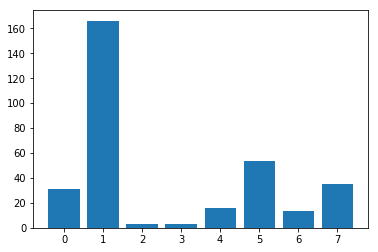

In [9]:
X_train_fs, X_test_fs = select_anova(X_train, y_train, X_test, visualize=True)

According to this histogram, features with numbers 1, 5 and 7 are the most important

### Way 2: Mutual information

In [10]:
from sklearn.feature_selection import mutual_info_classif

In [52]:
def select_mutual(X_train, y_train, X_test, k=None, visualize=False):
    if k==None:
        k=X_train.shape[1] - 1
    if k==0:
        return X_train, X_test
    fs = SelectKBest(score_func = mutual_info_classif, k=k)
    fs.fit(X_train,y_train)
    X_train_mt = fs.transform(X_train)
    X_test_mt = fs.transform(X_test)
    if visualize:
        for i in range(len(fs.scores_)):
            print(f"Feature {i}: {fs.scores_[i]}")
        plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
        plt.show()
    return X_train_mt, X_test_mt

Feature 0: 0.07197598636230351
Feature 1: 0.12600729924545062
Feature 2: 0.028056948795284864
Feature 3: 0.01266984876127042
Feature 4: 0.054365484107160356
Feature 5: 0.08822983594302625
Feature 6: 0.003832210380572132
Feature 7: 0.05033509538430492


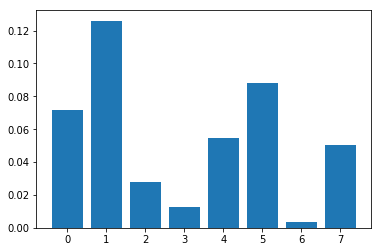

In [12]:
X_train_mt, X_test_mt = select_mutual(X_train, y_train, X_test, visualize=True)

Some columns are changed, but 1, 5 and 7 still are the most important

In [13]:
X_train_mt[0]

array([  1., 121.,  78.,  39.,  74.,  39.,  28.])

In [14]:
X_train[0]

array([  1.   , 121.   ,  78.   ,  39.   ,  74.   ,  39.   ,   0.261,
        28.   ])

### Way 3: Recursive Feature Elimination (RFE)

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE

def select_rfe(X_train, y_train, X_test, k=None, model=None, info=False):
    if k==None:
        k = X_train.shape[1] - 1
    if k==0:
        return X_train, X_test
    if model==None:
        model = GradientBoostingClassifier()
    rfe = RFE(estimator = model, n_features_to_select=k)
    rfe.fit(X_train, y_train)
    X_train_rf = rfe.transform(X_train)
    X_test_rf = rfe.transform(X_test)
    if info:
        for i in range(len(rfe.support_)):
            if rfe.support_[i]:
                print(f"Feature {i} is important enough")
            else:
                print(f"Feature {i} should be removed")
    return X_train_rf, X_test_rf

In [16]:
X_train_rf, X_test_rf = select_rfe(X_train, y_train, X_test,info=True)

Feature 0 is important enough
Feature 1 is important enough
Feature 2 is important enough
Feature 3 should be removed
Feature 4 is important enough
Feature 5 is important enough
Feature 6 is important enough
Feature 7 is important enough


### Way 3*  RFECV  
It is RFE with possibility to automatically select the number of chosen features

In [54]:
from sklearn.feature_selection import RFECV

def select_rfecv(X_train, y_train, X_test, model=None, info=False):
    if model==None:
        model = GradientBoostingClassifier()
    if k==0:
        return X_train, X_test
    rfecv = RFECV(estimator = model)
    rfecv.fit(X_train, y_train)
    X_train_rfc = rfecv.transform(X_train)
    X_test_rfc = rfecv.transform(X_test)
    if info:
        for i in range(len(rfecv.support_)):
            if rfecv.support_[i]:
                print(f"Feature {i} is important enough")
            else:
                print(f"Feature {i} should be removed")
    return X_train_rfc, X_test_rfc

In [18]:
X_train_rfcv, X_test_rfcv = select_rfecv(X_train, y_train, X_test,info=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Feature 0 should be removed
Feature 1 is important enough
Feature 2 should be removed
Feature 3 should be removed
Feature 4 should be removed
Feature 5 is important enough
Feature 6 is important enough
Feature 7 is important enough


### Way 4: Using boosting or regression models

In [19]:
def transform_data(X, k, feature_importances):
    ''' Drop k less important features from X'''
    included = sorted(feature_importances, reverse=True)[:k]
    importances = np.array(feature_importances).reshape(-1, 1)
    X = X.transpose()
    values = np.append(importances, X, axis=1)
    X_transformed = np.array([i for i in values if i[0] in included])
    X_transformed = X_transformed.transpose()[1:]
    return X_transformed

In [55]:
from sklearn.ensemble import RandomForestClassifier

def select_trees(X_train, y_train, X_test, k=None, n_estimators=None, visualize=False):
    if k==None:
        k=X_train.shape[1] - 1 # how many features should stay
    if k==0:
        return X_train, X_test
    if n_estimators==None:
        n_estimators = 10
    model = RandomForestClassifier(n_estimators = n_estimators)
    model.fit(X_train, y_train)
    X_train_tr = transform_data(X_train, k, model.feature_importances_)
    X_test_tr = transform_data(X_test, k, model.feature_importances_)
    if visualize:
        for i in range(len(model.feature_importances_)):
            print(f"Feature {i}: {model.feature_importances_[i]}")
        plt.bar([i for i in range(len(model.feature_importances_))], model.feature_importances_)
        plt.title("Computed feature importances")
        plt.show()
    return X_train_tr, X_test_tr

Feature 0: 0.07909087329037667
Feature 1: 0.2517161642729988
Feature 2: 0.10007170228250203
Feature 3: 0.05704135557828133
Feature 4: 0.07087435703809933
Feature 5: 0.1867414505909286
Feature 6: 0.11871655914777009
Feature 7: 0.13574753779904314


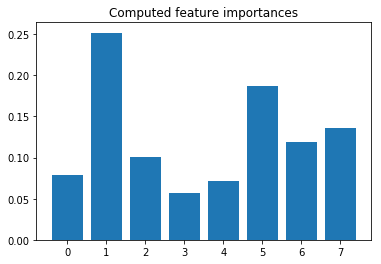

In [21]:
X_tr, X_t = select_trees(X_train, y_train, X_test, visualize=True)

In [22]:
print(X_test[1]) # check what was done
print(X_t[1])

[  4.    127.     88.     11.    155.     34.5     0.598  28.   ]
[  4.    127.     88.    155.     34.5     0.598  28.   ]


Use of Lasso, Ridge and other models with regression is almost the same, you just need to extract feature coefficients.
In addition, I'm going to try more advanced type of models - LightGBM

In [56]:
from lightgbm import LGBMClassifier
def select_with_boosting(X_train, y_train, X_test, k=None, visualize=False):
    if k==None:
        k=X_train.shape[1] - 1
    if k==0:
        return X_train, X_test
    X_train_, X_valid_, y_train_, y_valid_ = train_test_split(X_train, y_train, test_size=0.25) # split data to avoid overfitting
    model = LGBMClassifier(learning_rate=0.05, verbose=-1)
    model.fit(X_train, y_train, eval_set=[(X_valid_, y_valid_)], verbose = -1) #, early_stopping_rounds = 100
    features = model.feature_importances_/sum(model.feature_importances_)  # importance values are integers, so we give them a more visual form
    X_train_l = transform_data(X_train, k, features)
    X_test_l = transform_data(X_test, k, features)
    if visualize:
        for i in range(len(features)):
            print(f"Feature {i}: {features[i]}")
        plt.bar([i for i in range(len(features))], features)
        plt.title("Computed feature importances")
        plt.show()
    return X_train_l, X_test_l

Feature 0: 0.08478568064060292
Feature 1: 0.18370230805463966
Feature 2: 0.11069241639189825
Feature 3: 0.0814884597268017
Feature 4: 0.07489401789919925
Feature 5: 0.17428167687235044
Feature 6: 0.15967969853980216
Feature 7: 0.1304757418747056


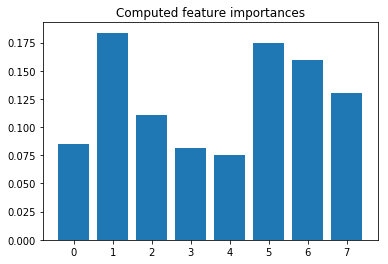

In [40]:
X_train_l, X_test_l = select_with_boosting(X_train, y_train, X_test, visualize=True)

### Final test

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

In [45]:
def evaluate_model(model, X, y): # or pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [46]:
extractors = [select_anova, select_mutual, select_rfe, select_trees, select_with_boosting]
names = ['Anova', 'Mutual inf-n', 'RFE', 'Decision trees', 'LGBM']

Result without extraction, scores = 0.7743269385230074
Model Anova, best result: k=1, scores = 0.7674297032274823
Model Mutual inf-n, best result: k=1, scores = 0.7674297032274823
Model RFE, best result: k=1, scores = 0.7674297032274823
Model Decision trees, best result: k=1, scores = 0.7674297032274823
Model LGBM, best result: k=1, scores = 0.7674297032274823


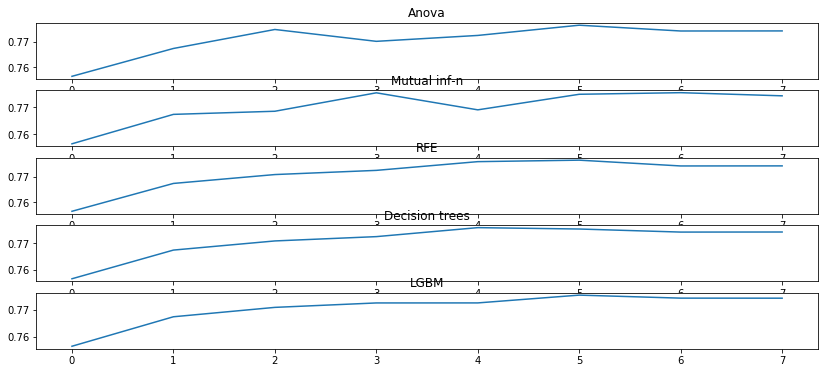

In [77]:
fig, axes = plt.subplots(nrows=len(extractors), ncols=1, figsize=(14,6))
num_features = [i+1 for i in range(X.shape[1])]
model = LogisticRegression(solver='liblinear')
result = np.mean(evaluate_model(model, X_train, y_train))
print(f"Result without extraction, scores = {result}")
for i in range(len(extractors)):
    ex_func = extractors[i]
    results = []
    best_k=1
    for k in num_features:
        model = LogisticRegression(solver='liblinear')
        _X_train, _X_test = ex_func(X_train, y_train, X_test, k)
        scores = evaluate_model(model, _X_train, y_train)
        results.append(np.mean(scores))
        if results[best_k-1]>results[k-1]:
            best_k = k
    print(f"Model {names[i]}, best result: k={best_k}, scores = {results[best_k]}")
    axes[i].plot(results)
    axes[i].set_title(names[i])
plt.show()

We have explored several types of models and come to the conclusion, that it would be better to delete only one feature. However, it's unlikely that you will use all these methods in your work. I think, first you should check the columns in pairs for correlation between them and delete one of each found pair (if there is one). This is quite fast and if the number of features is not very large, it may be enough 